# Proprocessing dataset

In [1]:
with open('../dataset/train3_v4.csv') as f:
        print(f)

<_io.TextIOWrapper name='../dataset/train3_v4.csv' mode='r' encoding='cp950'>


In [2]:
import pandas as pd
import datasets
from datasets import load_dataset, Dataset, DatasetDict

Qdata_frame = pd.read_csv('../dataset/train3_v4.csv')
#Qdata_frame = pd.read_csv('../dataset/train3_v4.csv')


c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
duplicated = Qdata_frame.duplicated(subset=['String'])

In [4]:
duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
809    False
810    False
811    False
812    False
813    False
Length: 814, dtype: bool

In [5]:
Qdata_frame = Qdata_frame.drop_duplicates(subset=['String'])

In [6]:
Qdata_frame['topic'] = Qdata_frame['topic'].apply(lambda x: x.strip().split(', '))

In [7]:
Qdata_frame

,id,String,topic,type
0,1,Which of the following are components of an in...,[Introduction to Information Processing],MC
1,2,Which of the following is an example of data c...,[Introduction to Information Processing],MC
2,3,Which of the following personnels is responsib...,[Introduction to Information Processing],MC
3,4,Which of the following is not a valid way to i...,[Introduction to Information Processing],MC
4,5,Which of the following is/are (a) method(s) of...,[Data Organisation and Data Control],MC
...,...,...,...,...
809,810,"In the case of (d)(i), will ALG1 or ALG2 be mo...","[Algorithm Design, Program Development]",LQ
810,811,What is the benefit of using an array to store...,[Algorithm Design],LQ
811,812,There are different kinds of online shopping w...,"[Database, Threats and Security on the Interne...",MC
812,813,A search engine can automatically the search r...,"[Internet Services and Applications, Networkin...",MC


In [8]:
class_dict = {
'Algorithm Design': "Algorithm Design", 
'Communication Software and Protocols': "Networking and Internet Basics", 
'Computer System': "Computer System", 
'Data Manipulation and Analysis': "Data Manipulation and Analysis", 
'Data Organisation and Data Control': "Data Organisation and Data Control", 
'Database': "Spreadsheets and Databases", 
'Elementary Web Authoring': "Elementary Web Authoring", 
'Health and Ethical Issues': "Health and Ethical Issues", 
'Input and Output Devices': "Basic Machine Organisation", 
'Intellectual Property': "Intellectual Property", 
'Internet Services and Applications': "Internet Services and Applications", 
'Introduction to HTML': "Elementary Web Authoring", 
'Introduction to Information Processing': "Information Processing", 
'Multimedia Elements': "Multimedia Elements", 
'Number System': "Data Organisation and Data Control", 
'Problem- Formulation and Analysis': "Program Development", 
'Program Development': "Program Development", 
'Program Testing and Debugging': "Program Development", 
'Secondary Storage Devices': "Basic Machine Organisation", 
'Spreadsheet': "Spreadsheets and Databases", 
'System Software': "Computer System", 
'Networking and Internet Basics': 'Networking and Internet Basics',
'System Unit of a Computer System': "Basic Machine Organisation", 
'The Networking and Internet Basics': "Networking and Internet Basics", 
'Threats and Security on the Internet': "Threats and Security on the Internet", 
'Word Presentation': "Data Manipulation and Analysis"}

In [9]:
Qdata_frame['newTopic'] = Qdata_frame['topic'].apply(lambda topics: [class_dict[topic] for topic in topics])

In [10]:
Qdata_frame['newTopic'][800]

['Program Development']

In [11]:
Qdata_frame[:5]

,id,String,topic,type,newTopic
0,1,Which of the following are components of an in...,[Introduction to Information Processing],MC,[Information Processing]
1,2,Which of the following is an example of data c...,[Introduction to Information Processing],MC,[Information Processing]
2,3,Which of the following personnels is responsib...,[Introduction to Information Processing],MC,[Information Processing]
3,4,Which of the following is not a valid way to i...,[Introduction to Information Processing],MC,[Information Processing]
4,5,Which of the following is/are (a) method(s) of...,[Data Organisation and Data Control],MC,[Data Organisation and Data Control]


In [12]:
# labelling
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Qdata_frame.reset_index(inplace=True)
Qdf = Qdata_frame.join(pd.DataFrame(mlb.fit_transform(Qdata_frame['newTopic']), columns=mlb.classes_))


In [13]:
pd.DataFrame(mlb.fit_transform(Qdata_frame['newTopic']), columns=mlb.classes_)


,Algorithm Design,Basic Machine Organisation,Computer System,Data Manipulation and Analysis,Data Organisation and Data Control,Elementary Web Authoring,Health and Ethical Issues,Information Processing,Intellectual Property,Internet Services and Applications,Multimedia Elements,Networking and Internet Basics,Program Development,Spreadsheets and Databases,Threats and Security on the Internet
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
802,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
803,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
804,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [14]:
Qdata_frame

,index,id,String,topic,type,newTopic
0,0,1,Which of the following are components of an in...,[Introduction to Information Processing],MC,[Information Processing]
1,1,2,Which of the following is an example of data c...,[Introduction to Information Processing],MC,[Information Processing]
2,2,3,Which of the following personnels is responsib...,[Introduction to Information Processing],MC,[Information Processing]
3,3,4,Which of the following is not a valid way to i...,[Introduction to Information Processing],MC,[Information Processing]
4,4,5,Which of the following is/are (a) method(s) of...,[Data Organisation and Data Control],MC,[Data Organisation and Data Control]
...,...,...,...,...,...,...
801,809,810,"In the case of (d)(i), will ALG1 or ALG2 be mo...","[Algorithm Design, Program Development]",LQ,"[Algorithm Design, Program Development]"
802,810,811,What is the benefit of using an array to store...,[Algorithm Design],LQ,[Algorithm Design]
803,811,812,There are different kinds of online shopping w...,"[Database, Threats and Security on the Interne...",MC,"[Spreadsheets and Databases, Threats and Secur..."
804,812,813,A search engine can automatically the search r...,"[Internet Services and Applications, Networkin...",MC,"[Internet Services and Applications, Networkin..."


In [15]:
Qdf

,index,id,String,topic,type,newTopic,Algorithm Design,Basic Machine Organisation,Computer System,Data Manipulation and Analysis,...,Elementary Web Authoring,Health and Ethical Issues,Information Processing,Intellectual Property,Internet Services and Applications,Multimedia Elements,Networking and Internet Basics,Program Development,Spreadsheets and Databases,Threats and Security on the Internet
0,0,1,Which of the following are components of an in...,[Introduction to Information Processing],MC,[Information Processing],0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,2,Which of the following is an example of data c...,[Introduction to Information Processing],MC,[Information Processing],0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,3,Which of the following personnels is responsib...,[Introduction to Information Processing],MC,[Information Processing],0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,4,Which of the following is not a valid way to i...,[Introduction to Information Processing],MC,[Information Processing],0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4,5,Which of the following is/are (a) method(s) of...,[Data Organisation and Data Control],MC,[Data Organisation and Data Control],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,809,810,"In the case of (d)(i), will ALG1 or ALG2 be mo...","[Algorithm Design, Program Development]",LQ,"[Algorithm Design, Program Development]",1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
802,810,811,What is the benefit of using an array to store...,[Algorithm Design],LQ,[Algorithm Design],1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,811,812,There are different kinds of online shopping w...,"[Database, Threats and Security on the Interne...",MC,"[Spreadsheets and Databases, Threats and Secur...",0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
804,812,813,A search engine can automatically the search r...,"[Internet Services and Applications, Networkin...",MC,"[Internet Services and Applications, Networkin...",0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [16]:
# split the train, test, and validation data
import sklearn
from sklearn.model_selection import train_test_split

Qdf_train, Qdf_remain = train_test_split(Qdf, train_size=0.8)
Qdf_valid, Qdf_test = train_test_split(Qdf_remain, test_size=0.5)

In [17]:
Qdf_train.shape

(644, 21)

In [18]:
Qdf_test.shape

(81, 21)

In [19]:
Qdf_valid.shape

(81, 21)

In [40]:
# change to hugging face dataset type
trainDS = Dataset.from_pandas(Qdf_train)
validDS = Dataset.from_pandas(Qdf_valid)
testDS = Dataset.from_pandas(Qdf_test)
ds = DatasetDict()
ds["train"] = trainDS
ds["valid"] = validDS
ds["test"] = testDS

labels_original = [label for label in ds['train'].features.keys() if label not in ['Unnamed: 0', 'String', '__index_level_0__', 'index', 'id', 'topic', 'type', 'newTopic']]

In [42]:
Qdf[labels_original].sum().sort_values()

Elementary Web Authoring                25
Information Processing                  30
Data Manipulation and Analysis          37
Internet Services and Applications      37
Intellectual Property                   39
Health and Ethical Issues               41
Multimedia Elements                     50
Algorithm Design                        52
Computer System                         64
Networking and Internet Basics          70
Program Development                     70
Threats and Security on the Internet    70
Spreadsheets and Databases              84
Data Organisation and Data Control      90
Basic Machine Organisation              92
dtype: int64

In [43]:
Qdf_train[labels_original].sum().sort_values()

Elementary Web Authoring                13
Information Processing                  25
Internet Services and Applications      27
Data Manipulation and Analysis          29
Intellectual Property                   32
Health and Ethical Issues               33
Algorithm Design                        42
Multimedia Elements                     43
Computer System                         51
Threats and Security on the Internet    57
Networking and Internet Basics          58
Program Development                     59
Spreadsheets and Databases              69
Data Organisation and Data Control      71
Basic Machine Organisation              73
dtype: int64

<AxesSubplot: >

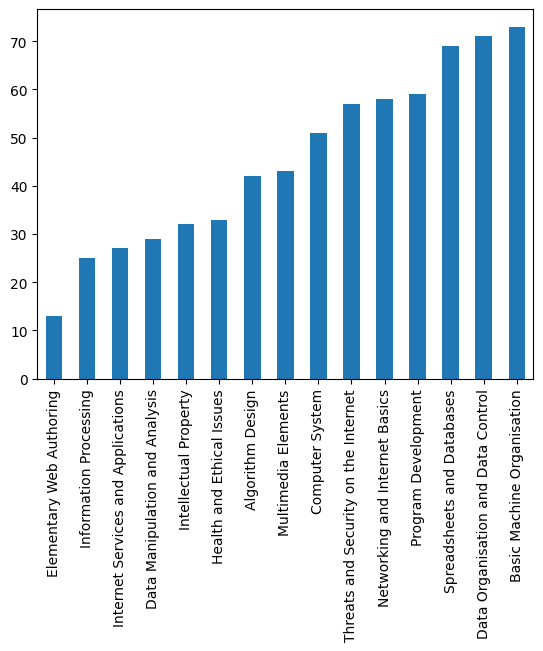

In [45]:
Qdf_train[labels_original].sum().sort_values().plot.bar()

<AxesSubplot: >

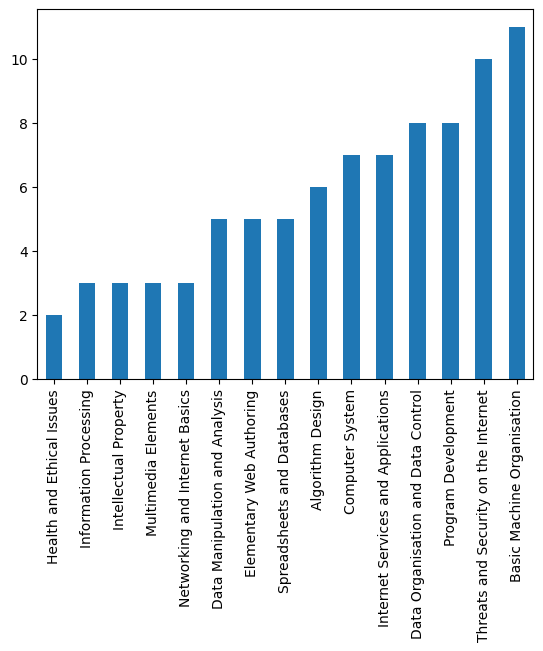

In [46]:
Qdf_valid[labels_original].sum().sort_values().plot.bar()

In [47]:
Qdf_valid[labels_original].sum().sort_values()

Health and Ethical Issues                2
Information Processing                   3
Intellectual Property                    3
Multimedia Elements                      3
Networking and Internet Basics           3
Data Manipulation and Analysis           5
Elementary Web Authoring                 5
Spreadsheets and Databases               5
Algorithm Design                         6
Computer System                          7
Internet Services and Applications       7
Data Organisation and Data Control       8
Program Development                      8
Threats and Security on the Internet    10
Basic Machine Organisation              11
dtype: int64

<AxesSubplot: >

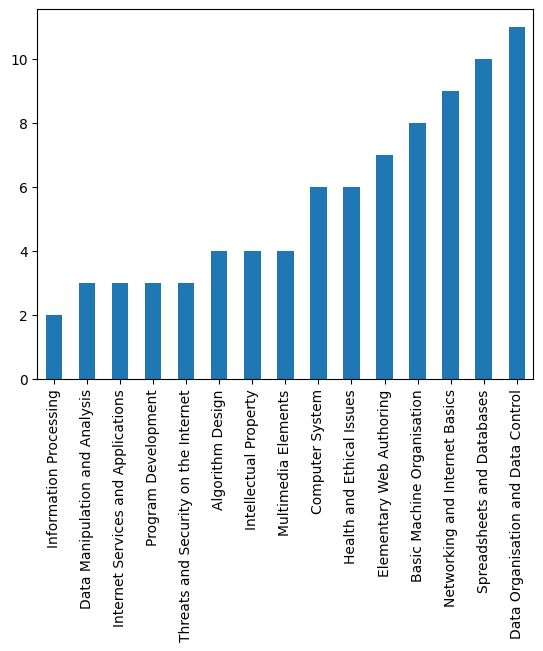

In [48]:
Qdf_test[labels_original].sum().sort_values().plot.bar()

In [49]:
Qdf_test[labels_original].sum().sort_values()

Information Processing                   2
Data Manipulation and Analysis           3
Internet Services and Applications       3
Program Development                      3
Threats and Security on the Internet     3
Algorithm Design                         4
Intellectual Property                    4
Multimedia Elements                      4
Computer System                          6
Health and Ethical Issues                6
Elementary Web Authoring                 7
Basic Machine Organisation               8
Networking and Internet Basics           9
Spreadsheets and Databases              10
Data Organisation and Data Control      11
dtype: int64

In [53]:
#  clear not used columns
columns = ds.column_names
columns_toRemove = ["id", "type", "topic", "newTopic", 'index']
new_ds = ds.remove_columns(columns_toRemove)
print(new_ds)


DatasetDict({
    train: Dataset({
        features: ['String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Spreadsheets and Databases', 'Threats and Security on the Internet', '__index_level_0__'],
        num_rows: 644
    })
    valid: Dataset({
        features: ['String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Spreadsheets and Databases', '

In [54]:
labels_original = [label for label in new_ds['train'].features.keys() if label not in ['Unnamed: 0', 'String', '__index_level_0__']]

In [55]:
labels_original

['Algorithm Design',
 'Basic Machine Organisation',
 'Computer System',
 'Data Manipulation and Analysis',
 'Data Organisation and Data Control',
 'Elementary Web Authoring',
 'Health and Ethical Issues',
 'Information Processing',
 'Intellectual Property',
 'Internet Services and Applications',
 'Multimedia Elements',
 'Networking and Internet Basics',
 'Program Development',
 'Spreadsheets and Databases',
 'Threats and Security on the Internet']

In [56]:
# extract the labels
labels_original
id2label = {idx:label for idx, label in enumerate(labels_original)}
label2id = {label:idx for idx, label in enumerate(labels_original)}

<AxesSubplot: >

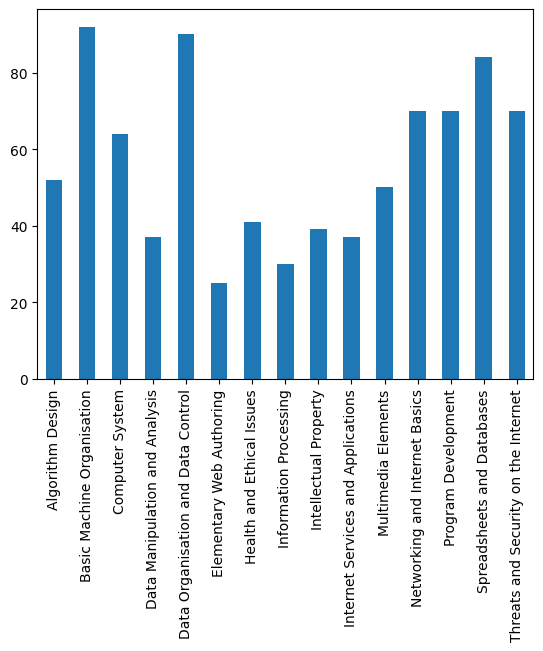

In [59]:
import matplotlib.pyplot as plt
Qdf[labels_original].sum().plot.bar()

In [60]:
new_ds.save_to_disk('./encoded_data4')